# DATA WRANGLING

In [2]:
#importación de librerías
import pandas as pd

#carga de datos
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt'
data = pd.read_csv(url)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## EXTRAER UN SUBCONJUNTO DE DATOS

In [3]:
account_length = data['Account Length']
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [4]:
type(account_length)

pandas.core.series.Series

In [5]:
subset = data[['Account Length', 'Phone', 'Eve Charge', 'Day Calls']]
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [6]:
type(subset)

pandas.core.frame.DataFrame

In [7]:
desired_columns = ['Account Length','Phone', 'Eve Charge','Day Calls']
subset = data[desired_columns]
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [8]:
desired_columns = ['Account Length', 'VMail Message', 'Day Calls']
all_columns_list = data.columns.values.tolist()

In [9]:
desired_columns

['Account Length', 'VMail Message', 'Day Calls']

In [10]:
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [11]:
sublist = [x for x in all_columns_list if x not in desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [12]:
subset = data[sublist]
subset.head()

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
#otra forma de hacerlo
a = set(desired_columns)
b = set(all_columns_list)
sublist = b - a
sublist = list(sublist)
subset = data[sublist]
subset.head()

,Intl Charge,Intl Calls,State,Intl Mins,Night Charge,Eve Charge,Eve Mins,Day Charge,CustServ Calls,Int'l Plan,Night Calls,Day Mins,Area Code,Churn?,Night Mins,VMail Plan,Phone,Eve Calls
0,2.70,3,KS,10.0,11.01,16.78,197.4,45.07,1,no,91,265.1,415,False.,244.7,yes,382-4657,99
1,3.70,3,OH,13.7,11.45,16.62,195.5,27.47,1,no,103,161.6,415,False.,254.4,yes,371-7191,103
2,3.29,5,NJ,12.2,7.32,10.30,121.2,41.38,0,no,104,243.4,415,False.,162.6,no,358-1921,110
3,1.78,7,OH,6.6,8.86,5.26,61.9,50.90,2,yes,89,299.4,408,False.,196.9,no,375-9999,88
4,2.73,3,OK,10.1,8.41,12.61,148.3,28.34,3,yes,121,166.7,415,False.,186.9,no,330-6626,122


In [14]:
# si en lugar de hacer subconjuntos de columnas queremos de filas:
data[4:12] # OJO QUE EMPIEZA POR 0, AMBOS VALORES SON POSICIONES PERO EL FINAL NO SE INCLUYE

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.


In [15]:
# si se quiere filtrar las filas por una condición
# usuarios con Total Mins > 300 mins
data1 = data[data['Day Mins'] > 300]
data1

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True.
230,MD,93,408,360-3324,yes,no,0,312.0,109,53.04,129.4,100,11.00,217.6,74,9.79,10.5,2,2.84,0,True.
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,260.9,114,22.18,312.1,89,14.04,5.3,3,1.43,1,True.
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True.
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False.
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False.
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True.


In [16]:
#usuarios de Nueva York (State = 'NY')
data2 = data[data['State'] == 'NY']
data2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,217.5,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,237.7,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,64.3,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,NY,150,415,421-6268,no,yes,35,139.6,72,23.73,332.8,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False.
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,188.6,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,198.1,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,163.7,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.


In [17]:
# AND ---> &
# usuarios de Nueva York con Day Mins > 300 
data3 = data[(data['State'] == 'NY') & (data['Day Mins'] > 300)]
data3

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [18]:
# OR ---> |
data4 = data[(data['Day Mins'] > 300) | (data['State'] == 'NY')]
data4.shape

(124, 21)

In [19]:
#filtrado donde las llamadas de noche superen las de día
data5 = data[data['Night Calls'] > data['Day Calls']]
data5.shape

(1626, 21)

In [20]:
#filtrado donde los minutos de las llamadas de noche superen a las de día
data6 = data[data['Night Mins'] > data['Day Mins']]
data6.shape

(2051, 21)

In [21]:
# Minutos de día, de noche y Longitud de la Cuenta de los primeros 50 individuos
subset_first_50 = data[['Day Mins', 'Night Mins', 'Account Length']][:50]
subset_first_50.shape

(50, 3)

In [22]:
data.iloc[1:10,3:6] # para extraer filas y columnas a la vez por índices [filas, columnas]
# .iloc para basado en índices y .loc para basado en etiquetas

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [23]:
data['Total Mins'] = data['Day Mins'] + data['Night Mins'] + data['Eve Mins']
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.,650.8
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.,575.8
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.,661.5
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.,512.6


In [24]:
data['Total Calls'] = data['Day Calls'] + data['Night Calls'] + data['Eve Calls']
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.,650.8,286
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.,575.8,235
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.,661.5,258
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.,512.6,326


# GENERACIÓN ALEATORIA DE NÚMEROS

In [35]:
#importación de librerías
import numpy as np

25

## RANDOM

In [36]:
#generar un número aleatorio entre 1 y 100
np.random.randint(1,100)

24

In [40]:
#la forma más clásica de generar un número aleatorio es entre 0 y 1
np.random.random()

0.10351240671806494

In [47]:
#función que genera una lista de n números aleatorios enteros dentro del intervalo [a,b]
def randint_list(n,a,b):
  x = []
  for i in range(n):
    x.append(np.random.randint(a,b))
  return x

In [ ]:
randint_list(25,1,50)

In [55]:
#ya existe un paquete que contiene una función que hace lo mismo
import random
random.randrange(0,100,2) #los parámetros es el inicio, el final y el paso

74

## SHUFFLE

In [66]:
#numpy tiene una función sobre shuffle (como barajar)
a = np.arange(100) #Es como un rango pero en array
np.random.shuffle(a) #Ojo que devuelve None, y lo que hace es que sobre el array de entrada los baraja
a


array([56, 54, 37, 48, 71, 97, 96, 85, 67, 14, 36,  1, 76, 60, 83, 15, 62,
       52, 89, 90, 68,  4, 81, 88, 20, 27, 84, 51, 72, 70,  2, 66,  8, 98,
       69, 75, 24, 49,  5, 91, 55,  6, 86, 57, 17, 32, 79, 95, 45, 92, 46,
       74, 78, 31, 22, 13, 50, 94, 63, 42, 10, 35, 53, 41, 11, 26, 99, 29,
       87, 23, 61, 64, 16, 80, 12,  3, 21, 33, 25,  9, 82, 38, 44,  0, 28,
        7, 77, 30, 73, 93, 58, 40, 47, 65, 39, 43, 18, 34, 19, 59])

## CHOICE

In [69]:
#el método choice elige un elemento aleatorio dentro de un conjunto dado
column_list = data.columns.values.tolist()
np.random.choice(column_list)

'Day Mins'

## SEED

In [77]:
np.random.seed(2018)
for i in range(5):
  print(np.random.random())
#cuando se fija la semilla, los números aleatorios que se generan son los mismos siempre

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


## DISTRIBUCIÓN UNIFORME
La función random sigue una distribución uniforme, que quiere decir que la probabilidad de aparición de cada uno de los números es igual

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

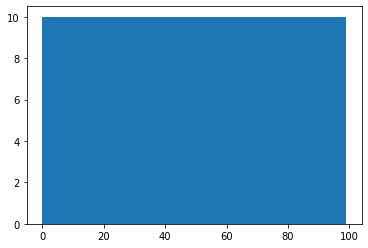

In [81]:
import matplotlib.pyplot as plt
a = np.arange(100)
np.random.shuffle(a)
plt.hist(a)